# Лабораторная работа 8

## Обход бинарного дерева поиска. Поиск максимального и минимального значений

*Ляпунова Арина 21.05.2025*

## Задание 8.1. Центрированный обход бинарного дерева поиска

In [1]:
class BinaryTree():
    def __init__(self):
        self.root=EmptyNode()
    def __repr__(self):
        return repr(self.root)
    def insert(self,value):
        self.root= self.root.insert(value)

    def lcr(self):
        return self.root.lcr()    
        

class BinaryNode():
    def __init__(self,left,value,right):
        self.right= right
        self.left=left
        self.value= value
    def __repr__(self):
        return f'({self.left},{self.value},{self.right})'
    def insert(self,value):
        if value < self.value:
            self.left= self.left.insert(value)
        else:
            self.right= self.right.insert(value)
        return self

    def lcr(self): 
        result= self.left.lcr()+[self.value]+self.right.lcr()
        return result
        

class EmptyNode():
    def __repr__(self):
        return '*'
    def insert(self,value):
        return BinaryNode(self,value,self)

    def lcr(self):
        return []
            

In [2]:
import random as rnd
source_data = list(rnd.uniform(0,100) for _ in range(10**3))

In [3]:
tree = BinaryTree()
for i in source_data:
 tree.insert(i)


In [4]:
sorted_data = tree.lcr()


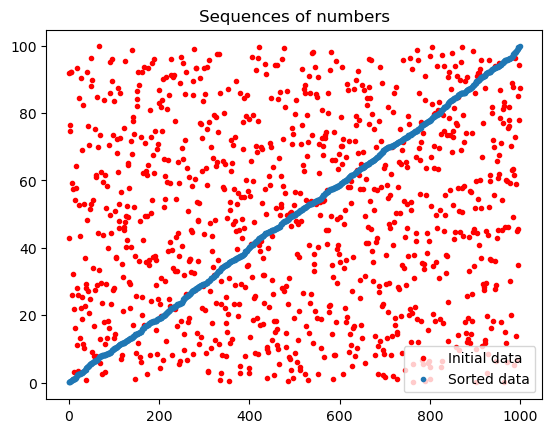

In [5]:
import matplotlib.pyplot as plt
plt.plot(source_data,'r.', label='Initial data')
plt.plot(sorted_data,' .',label='Sorted data')
plt.title('Sequences of numbers')
plt.legend()

## Задание 8.2. Нахождение минимального и максимального значения

In [6]:
class BinaryTree():
    def __init__(self):
        self.root=EmptyNode()
    def __repr__(self):
        return repr(self.root)
    def insert(self,value):
        self.root= self.root.insert(value)
        
    def lcr(self):
        return self.root.lcr() 

    def min(self):
        return self.root.min()
    def max(self):
        return self.root.max()    

class BinaryNode():
    def __init__(self,left,value,right):
        self.right= right
        self.left=left
        self.value= value
    def __repr__(self):
        return f'({self.left},{self.value},{self.right})'
    def insert(self,value):
        if value < self.value:
            self.left= self.left.insert(value)
        else:
            self.right= self.right.insert(value)
        return self

    def lcr(self):
        result= self.left.lcr()+[self.value]+self.right.lcr()
        return result

    def min(self):
        if isinstance(self.left, EmptyNode):
            return self.value
        else:
            return self.left.min()  
    def max(self):
        if isinstance(self.right, EmptyNode):
            return self.value
        else:
            return self.right.max()

   
class EmptyNode():
    def __repr__(self):
        return '*'
    def insert(self,value):
        return BinaryNode(self,value,self)

    def lcr(self):
        return []
    def min(self):
        return None 
    def max(self):
        return None
      

In [7]:
tree = BinaryTree()
for i in source_data:
 tree.insert(i)

In [8]:
minimum = tree.min()
maximum = tree.max()
print("Минимальное значение=",minimum)
print("Максимальное значение=",maximum)

Минимальное значение= 0.02297237022330645
Максимальное значение= 99.78956591843998


In [9]:
none_tree=EmptyNode()

minimum =none_tree.min()
maximum = none_tree.max()

In [10]:
print("Минимальное значение=",minimum)
print("Максимальное значение=",maximum)

Минимальное значение= None
Максимальное значение= None


## Задание 8.3. Создание модуля

In [24]:
from binaryTree import BinaryTree

tree1 = BinaryTree()
tree1.insert(8)
tree1.insert(6)
tree1.insert(4)
tree1.insert(2)
print(tree1.lcr())  

[2, 4, 6, 8]


In [12]:
list=[x**2 for x in range(10)]
my_tree = BinaryTree()
for i in list:
 my_tree.insert(i)

print(my_tree)    


(*,0,(*,1,(*,4,(*,9,(*,16,(*,25,(*,36,(*,49,(*,64,(*,81,*))))))))))


In [13]:
my_min=my_tree.min()
my_max=my_tree.max()

print("Минимальный элемент=",my_min)
print("Максимальный элемент=",my_max)


Минимальный элемент= 0
Максимальный элемент= 81


In [14]:
note=[]
no_tree = BinaryTree()
for i in note:
 no_tree.insert(i)
print(no_tree)

*


In [15]:
n_min=no_tree.min()
n_max=no_tree.max()

print("Минимальный элемент=",n_min)
print("Минимальный элемент=",n_max)

Минимальный элемент= None
Минимальный элемент= None


## Задание 8.4 Примеры пользовательских классов

**1) Конвертор бунов в бачи с `classmethod`,`staticmethod`**

In [16]:
class CurrencyConverter:
    k=3.27
    def __init__(self,amount_byn):
        if not self.is_valid_amount(amount_byn):
            raise ValueError("Сумма должна быть положительным числом")
        self.amount_byn=amount_byn
    def convert_to_usd(self):
        return round(self.amount_byn / self.k, 2)

    @classmethod
    def new_k(cls,new_k):
        if new_k>0:
            cls.k=new_k
        else:
            raise ValueError('Курс должен быть положительным')

    @staticmethod
    def is_valid_amount(amount):
         return isinstance(amount, (int, float)) and amount > 0

In [17]:
converter = CurrencyConverter(100) 
print(f"100 BYN → {converter.convert_to_usd()} USD")

100 BYN → 30.58 USD


In [18]:
CurrencyConverter.new_k(2.2)  
new_converter = CurrencyConverter(100)
print(f"100 BYN → {new_converter.convert_to_usd()} USD по новому курсу")

100 BYN → 45.45 USD по новому курсу


**2)Площадь фигур с `abstractmethod`**

In [19]:
from abc import ABC, abstractmethod

class Shape(ABC): 
    @abstractmethod
    def area(self):
        pass

class Circle(Shape):
    def __init__(self, radius):
        self.radius = radius
    def area(self):
        return 3.14 * self.radius ** 2  

class Square(Shape):
    def __init__(self, side):
        self.side = side
    def area(self):
        return self.side ** 2  


In [20]:
circle = Circle(100)
square = Square(5.5)
print("Площадь круга:", circle.area())
print("Площадь квадрата:", square.area())

Площадь круга: 31400.0
Площадь квадрата: 30.25


**3)Ограничитель скорости с `property`**

In [21]:
class Car:
    def __init__(self, speed=0):
        self._speed = speed

    @property
    def speed(self):
        return self._speed

    @speed.setter
    def speed(self, value):
        if 0 <= value <= 220:
            self._speed = value
        else:
            raise ValueError("Не гоняйте, пацаны")


In [22]:
car = Car()
car.speed = 150 
print(f"Текущая скорость: {car.speed} км/ч")

Текущая скорость: 150 км/ч


In [23]:
car.speed = 300 
print(car.speed)

ValueError: Не гоняйте, пацаны